# Subject: Classical Data Analysis

## Session 2 - Regression with multiple variables

### Demo 1 -  Linear Regression with one and multiple variables in Python

# 1. Data

Let's take a look again at some data - Advertising - , ask some questions about that data, and then use linear regression (with one and multiple variables) to answer those questions!

In [75]:
# imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
# read data into a DataFrame
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [77]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


What are the **independent variables**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **dependent variable**?
- Sales: sales of a single product in a given market (in thousands of widgets)

# 2. Revision - Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

# 3 - Linear Regression with one variable in Statsmodels

## 3.1. Regression model with one variable and with a constant:

Definition of the Independent variable (X) and the Dependent variable (y):

In [78]:
X = df["TV"]
y = df["sales"]

Adds a constant term to the predictor. So that we fit the intercept of our linear model.

In [79]:
X = sm.add_constant(X) 
X.head()

,const,TV
1,1.0,230.1
2,1.0,44.5
3,1.0,17.2
4,1.0,151.5
5,1.0,180.8


Argument order of the Regression model:

In [80]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [81]:
model.params

const    7.032594
TV       0.047537
dtype: float64

Predictions by the model:

In [82]:
predictions = model.predict(X) 
predictions

array([ 17.97077451,   9.14797405,   7.85022376,  14.23439457,
        15.62721814,   7.44616232,   9.76595037,  12.74649773,
         7.44140866,  16.53041431,  10.17476548,  17.23871025,
         8.16396559,  11.66741599,  16.73482186,  16.32125309,
        10.25557777,  20.40940417,  10.32212907,  14.03474068,
        17.41459582,  18.31779199,   7.6600772 ,  17.88520856,
         9.99412625,  19.52997632,  13.82557947,  18.44614092,
        18.85970969,  10.38868036,  20.95607553,  12.39948025,
        11.653155  ,  19.65832525,  11.58185004,  20.85149492,
        19.72012288,  10.58358059,   9.08142275,  17.87094757,
        16.65876324,  15.44657891,  20.98935118,  16.86792445,
         8.22576322,  15.35625929,  11.2966302 ,  18.43663359,
        17.83291826,  10.21279479,  16.53041431,  11.80527225,
        17.31952254,  15.71278409,  19.52046899,  16.48763133,
         7.37961102,  13.50708398,  17.05331735,  17.04856369,
         9.57580381,  19.45391769,  18.4081116 ,  11.91

Print out the statistics:

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           1.47e-42
Time:                        22:47:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.



### Interpreting confidence intervals

The p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

### Interpreting the fitness of the model

The coefficient of determination "R-squared (R2)" is a measure of the global fit of the model. Specifically, R2 is an element of [0,1] and represents the proportion of variability in Y that may be attributed to some linear combination of the regressors (independent variables) in X.

R2 is often interpreted as the proportion of response variation "explained" by the regressors in the model. Thus, R2=1 indicates that the fitted model explains all variability in Y, while R2=0 indicates no 'linear' relationship (for straight line regression, this means that the straight line model is a constant line (slope = 0, intercept = Y) between the dependent variable and he independent variables). An interior value such as R2=0.7 may be interpreted as follows: "Seventy percent of the variance in the response variable can be explained by the independent variables. The remaining thirty percent can be attributed to unknown, inherent variability."

0.612 is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

### Interpreting the meaning of the table indicators

#### The left part of the first table provides basic information about the model fit:

- Dep. Variable - Which variable is the response in the model.

- Model - What model you are using in the fit.

- Method - How the parameters of the model were calculated.

- No. Observations- The number of observations (examples).

- DF Residuals - Degrees of freedom of the residuals. Number of observations – number of parameters.

- DF Model - Number of parameters in the model (not including the constant term if present).

#### The right part of the first table shows the goodness of fit:

- R-squared- The coefficient of determination. A statistical measure of how well the regression line approximates the real data points.

- Adj. R-squared - The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals.

- F-statistic	- A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals.

- Prob (F-statistic) - The probability that you would get the above statistic, given the null hypothesis that they are unrelated.

- Log-likelihood - The log of the likelihood function.

- AIC	(The Akaike Information Criterion) - Adjusts the log-likelihood based on the number of observations and the complexity of the model.

- BIC - The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.

#### The second table reports for each of the coefficients:
 
- coef - The estimated value of the coefficient.

- std err - The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.

- t - The t-statistic value. This is a measure of how statistically significant the coefficient is.

- P > |t|	- P-value that the null-hypothesis, when the coefficient = 0, is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response and we find enough evidence to reject H0.

- [95.0% Conf. Interval] - The lower and upper values of the 95% confidence interval.

#### Finally, there are several statistical tests to assess the distribution of the residuals

- Skewness - A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).

- Kurtosis - A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).

- Omnibus	D’Angostino’s test - It provides a combined statistical test for the presence of skewness and kurtosis.

- Prob(Omnibus) - The above statistic turned into a probability.

- Jarque-Bera - A different test of the skewness and kurtosis.

- Prob (JB) -	The above statistic turned into a probability.

- Durbin-Watson - A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis.

- Cond. No - A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).

### Plot statsmodels linear regression (OLS)

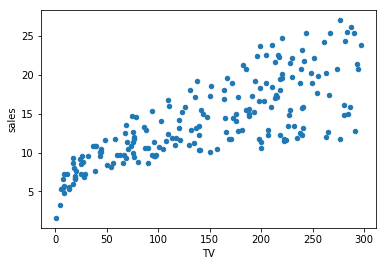

In [84]:
ax = df.plot(x='TV', y='sales', kind='scatter') # scatter-plot data

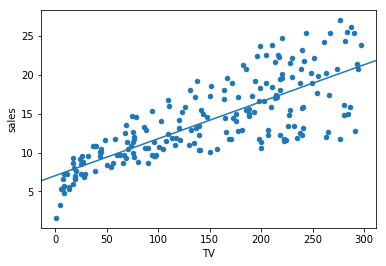

In [85]:
from statsmodels.graphics.regressionplots import abline_plot
abline_plot(model_results=model, ax=ax) # plot regression line

## 3.2. Regression model with one variable and without a constant:

Definition of the Independent variable (X) and the Dependent variable (y):

In [86]:
X = df["TV"]
y = df["sales"]

Remove the constant term to the predictor. So that we fit the intercept of our linear model at 0.

In [87]:
X = sm.add_constant(X) 
X.head()

,const,TV
1,1.0,230.1
2,1.0,44.5
3,1.0,17.2
4,1.0,151.5
5,1.0,180.8


In [88]:
X["const"] = X["const"].apply(lambda x: x*0)
X

,const,TV
1,0.0,230.1
2,0.0,44.5
3,0.0,17.2
4,0.0,151.5
5,0.0,180.8
6,0.0,8.7
7,0.0,57.5
8,0.0,120.2
9,0.0,8.6
10,0.0,199.8


Argument order of the Regression model:

In [89]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [90]:
model.params

const    0.00000
TV       0.08325
dtype: float64

Predictions by the model:

In [91]:
predictions = model.predict(X) 
predictions

array([ 19.15573497,   3.70460759,   1.43189327,  12.61231572,
        15.05152926,   0.7242716 ,   4.7868525 ,  10.00660297,
         0.71594663,  16.63327182,   5.50279914,  17.87369099,
         1.98134069,   8.11683685,  16.99124514,  16.26697354,
         5.64432347,  23.42643989,   5.76087292,  12.26266736,
        18.18171454,  19.76345711,   1.09889484,  19.00588567,
         5.18645062,  21.88632213,  11.89636909,  19.98823105,
        20.71250265,   5.87742238,  24.38381039,   9.39888082,
         8.09186197,  22.11109608,   7.96698755,  24.20066125,
        22.21932057,   6.21874577,   3.58805814,  18.98091079,
        16.85804577,  14.73518074,  24.44208512,  17.22434404,
         2.08956518,  14.57700649,   7.4674899 ,  19.97158113,
        18.9143111 ,   5.56939882,  16.63327182,   8.35826072,
        18.01521533,  15.20137855,  21.86967221,  16.55834717,
         0.60772214,  11.33859671,  17.54901752,  17.54069256,
         4.45385407,  21.75312276,  19.92163137,   8.54

Print out the statistics:

In [92]:
model.summary()

C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: inv

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1733.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          3.52e-100
Time:                        22:47:20   Log-Likelihood:                -597.51
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     199   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const               0          0        nan        nan             0         0
TV             0.0832      0.002     41.633      0.000         0.079     0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpreting the fitness of the model

R2 is higher (0.897).

### Plot statsmodels linear regression (OLS)

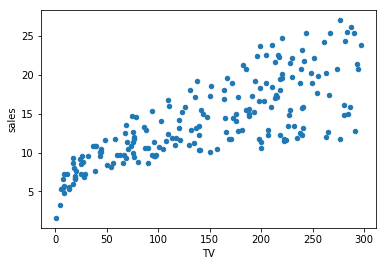

In [93]:
ax = df.plot(x='TV', y='sales', kind='scatter') # scatter-plot data

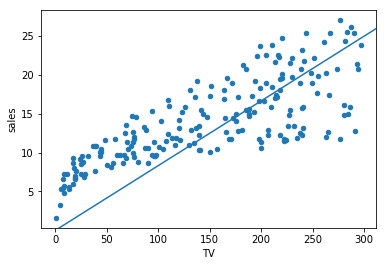

In [94]:
from statsmodels.graphics.regressionplots import abline_plot
abline_plot(model_results=model, ax=ax) # plot regression line

# 4 - Linear Regression with multiple variables in Statsmodels

## 4.1. Regression model with two variables and with a constant:

Definition of the Independent variables (X) and the Dependent variable (y):

In [95]:
X = df[["TV", "radio"]]
y = df["sales"]

Adds a constant term to the predictor. So that we fit the intercept of our linear model.

In [96]:
X = sm.add_constant(X) 
X.head()

,const,TV,radio
1,1,230.1,37.8
2,1,44.5,39.3
3,1,17.2,45.9
4,1,151.5,41.3
5,1,180.8,10.8


Argument order of the Regression model:

In [97]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

Predictions by the model:

In [98]:
predictions = model.predict(X) 
predictions

array([ 20.55546463,  12.34536229,  12.33701773,  17.61711596,
        13.22390813,  12.51208449,  11.71821241,  12.10551553,
         3.7093792 ,  12.55169696,   7.0358597 ,  17.25652015,
        10.60866187,   8.81095051,  18.44466773,  20.82891539,
        12.90386507,  23.24107626,   9.94121476,  14.15384619,
        18.12139161,  14.74206357,   6.51417168,  16.54402663,
         8.14035215,  15.6080206 ,  14.96769383,  17.0463346 ,
        19.39954145,   9.15929748,  21.64292187,  11.35791808,
         7.65045928,  18.83346334,   7.56302763,  16.99280099,
        23.36720719,  15.6258994 ,   9.91257829,  20.4405801 ,
        16.37872122,  17.29870935,  21.5621537 ,  13.96692266,
         8.9009974 ,  15.16263814,   8.88644967,  21.69944046,
        16.28690268,   8.18162949,  12.64569407,   9.31962792,
        20.66180115,  19.96126242,  20.35512357,  21.30864743,
         8.53774783,  12.76239488,  21.89072858,  18.10746914,
         5.74497097,  22.90418658,  16.78413768,  13.18

Print out the statistics:

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           4.83e-98
Time:                        22:47:32   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the fitness of the model

R2 is the same of the Regression model with one variable and without a constant: 0.897.

## 4.2. Regression model with two variables and without a constant:

Definition of the Independent variables (X) and the Dependent variable (y):

In [100]:
X = df[["TV", "radio"]]
y = df["sales"]

Remove the constant term to the predictor. So that we fit the intercept of our linear model at 0.

In [101]:
X = sm.add_constant(X) 
X.head()

,const,TV,radio
1,1,230.1,37.8
2,1,44.5,39.3
3,1,17.2,45.9
4,1,151.5,41.3
5,1,180.8,10.8


In [102]:
X["const"] = X["const"].apply(lambda x: x*0)
X

,const,TV,radio
1,0,230.1,37.8
2,0,44.5,39.3
3,0,17.2,45.9
4,0,151.5,41.3
5,0,180.8,10.8
6,0,8.7,48.9
7,0,57.5,32.8
8,0,120.2,19.6
9,0,8.6,2.1
10,0,199.8,2.6


Argument order of the Regression model:

In [103]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

Predictions by the model:

In [104]:
predictions = model.predict(X) 
predictions

array([ 21.52687053,  11.70033363,  11.75799899,  18.04038984,
        12.46129173,  11.99861985,  10.88189026,  11.21083559,
         0.96648604,  11.57140107,   4.99206255,  17.43074977,
         9.57539042,   7.13841977,  18.94629966,  21.95617418,
        12.34216009,  24.76472079,   8.62559283,  13.71037295,
        18.50545567,  14.22274996,   4.47023872,  16.50384845,
         6.38579941,  15.24441736,  14.74134345,  17.10394299,
        20.03149482,   7.64212658,  22.73306573,  10.29209191,
         5.68473095,  19.28010996,   5.57889639,  16.91058397,
        24.95898285,  15.73645307,   8.654832  ,  21.38812664,
        16.36105257,  17.57770066,  22.63009266,  13.32737874,
         7.43193972,  14.90531525,   7.25250634,  22.93615469,
        16.18434129,   6.42605339,  11.68920715,   7.76870588,
        21.69432806,  20.90069008,  21.19443514,  22.54868599,
         7.02109854,  11.99417307,  23.24851028,  18.50722105,
         3.40564026,  24.39265566,  16.77732929,  12.60

Print out the statistics:

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5206.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          6.73e-172
Time:                        22:47:56   Log-Likelihood:                -426.71
No. Observations:                 200   AIC:                             857.4
Df Residuals:                     198   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const               0          0        nan        nan             0         0
TV             0.0548      0.001     42.962      0.000         0.052     0.057
radio          0.2356      0.008     29.909      0.000         0.220     0.251
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.829
Skew:                          -0.112   Prob(JB):                       0.0121
Kurtosis:                       4.005   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpreting the fitness of the model

R2 is higher (0.981).

# 5. Stepwise Regression 


Using the summary method, you can check the p values of your variables written as 'P>|t|'. Then check for the variable with the highest p value. Then remove this variable from your array and repeat all the steps.

Repeat these methods until you remove all the columns which have p value higher than the significance value(e.g 0.05). In the end your variable X optimal will have all the optimal variables with p values less than significance level.

In [71]:
import statsmodels.formula.api as sm

In [72]:
X = df[["TV", "radio", "newspaper"]]
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          2.43e-171
Time:                        22:18:56   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000         0.051     0.056
radio          0.2222      0.009     23.595      0.000         0.204     0.241
newspaper      0.0168      0.007      2.517      0.013         0.004     0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""